In [ ]:
# Finds the refractive index at a given wavelength of 
# photoresist material, given Sellmeier fits to empirical data

# 2023 Dec. 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ref: Table 2 in Schmidt+ 2019 Optical Materials Express 9:12 4564

# [ B_1, C_1, B_2, C_2, B_3, C_3 ]
# units: [ 1, um**2, 1, um**2, 1, um**2 ]

coeffs_sellmeier_ipdip = np.array([1.2899, 1.1283e-2, 6.0569e-2, 7.7762e-2, 1.1844e5, 2.5802e7])

In [23]:
def n_sell(wavel_um, coeffs_array):
    
    n_sqd = 1. + np.divide((coeffs_array[0]*wavel_um**2),(wavel_um**2 - coeffs_array[1])) + \
                np.divide((coeffs_array[2]*wavel_um**2),(wavel_um**2 - coeffs_array[3])) + \
                np.divide((coeffs_array[4]*wavel_um**2),(wavel_um**2 - coeffs_array[5]))
    
    return np.sqrt(n_sqd)

In [24]:
wavel_samples = np.linspace(.400,1.600,200) # um

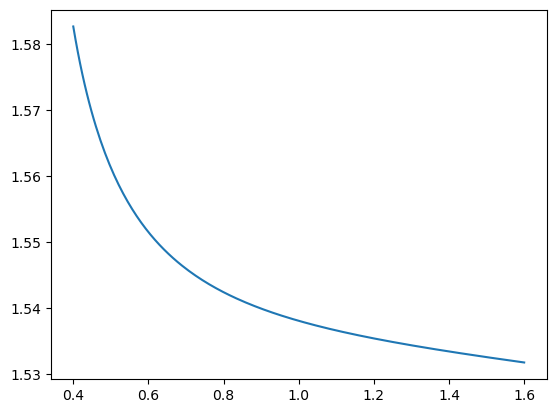

In [25]:
plt.plot(wavel_samples,n_sell(wavel_samples, coeffs_sellmeier_ipdip))
plt.show()

In [31]:
n_glint_chip = n_sell(wavel_um = np.array([1.50,1.55,1.60]), 
       coeffs_array = coeffs_sellmeier_ipdip) # GLINT bandpass is 1.55 um +-50 nm

print('n for GLINT science bandpass (cut-on, mid, cut-off):',n_glint_chip)

n for GLINT science bandpass (cut-on, mid, cut-off): [1.53258279 1.53217269 1.53177201]
